## Analyse churn des clients :

In [1]:
#Chargement des bibliotheques :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%matplotlib qt

In [2]:
#Chargement des données:
df = pd.read_csv(r"C:\Users\destockafric\Downloads\Churn_Modelling.csv")


In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Data understanding :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Affichage de structure des données :
df.shape

(10000, 14)

In [6]:
# Affichage des colonnes :
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [8]:
#Affichage des indices :

In [9]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [10]:
#Vérification de lexitance des champs manquants:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Statistiques descriptives pour décrire les données :
- Estimateurs statistiques simples
- Les représentations graphiques

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [12]:
df1 = df[['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [13]:
#Comparaison quantitatif entre la moyenne et la medianne :
abs ( ( df1.mean() - df1.median() ) / df1.mean() ) *100
#Grand écart ca veut dire il ya des valeurs abberents

RowNumber            0.000000
CustomerId           0.001291
CreditScore          0.226154
Age                  4.937593
Tenure               0.255346
Balance             27.080355
NumOfProducts       34.649065
HasCrCard           41.743444
IsActiveMember      94.137061
EstimatedSalary      0.103582
Exited             100.000000
dtype: float64

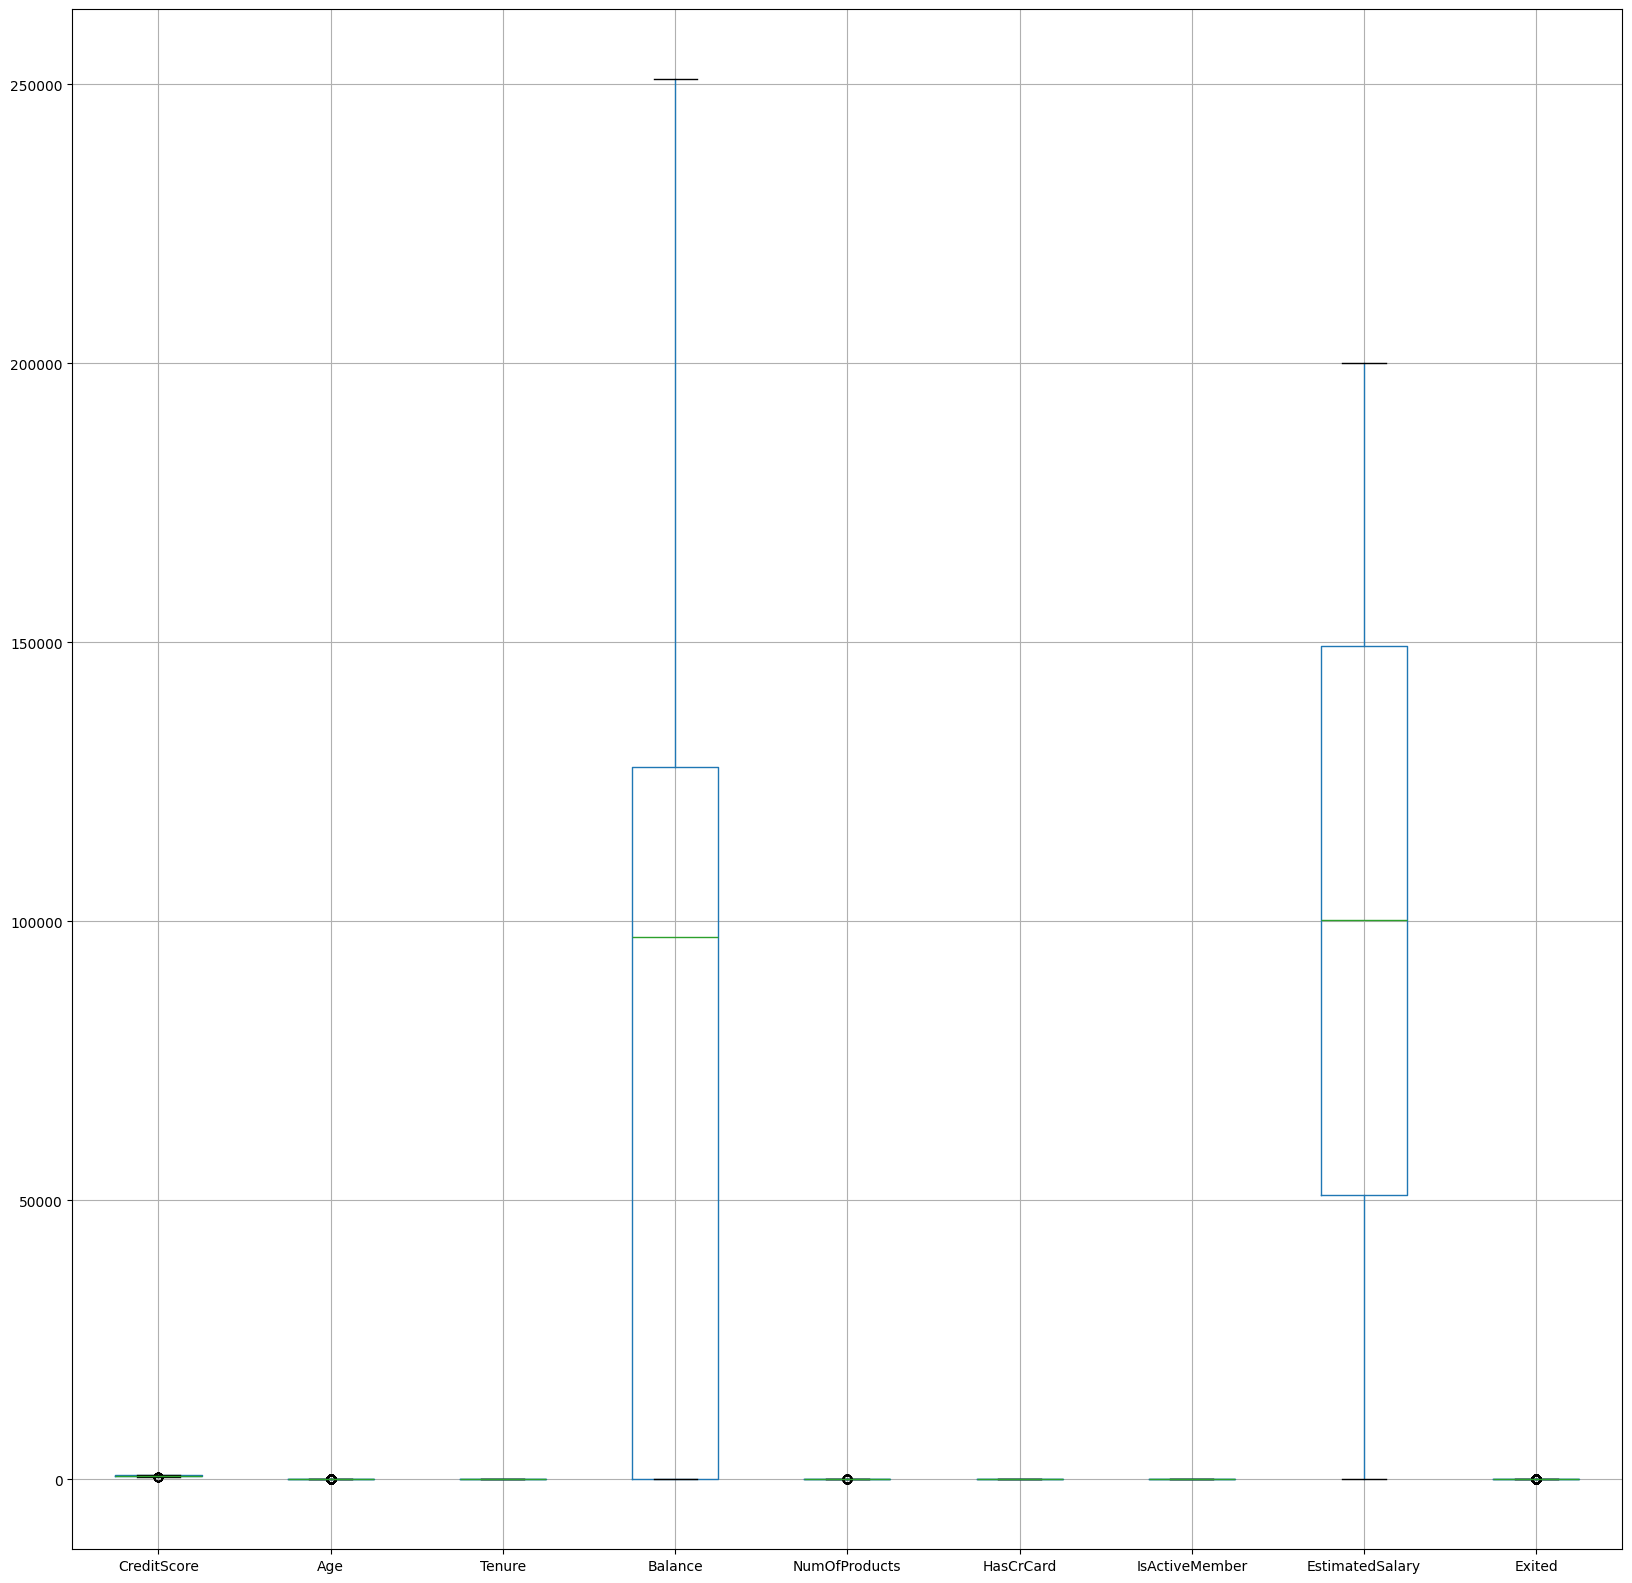

In [14]:
# Utilisation des boites à moustaches :
df.drop(columns=['RowNumber','CustomerId']).boxplot(figsize=(20,20));

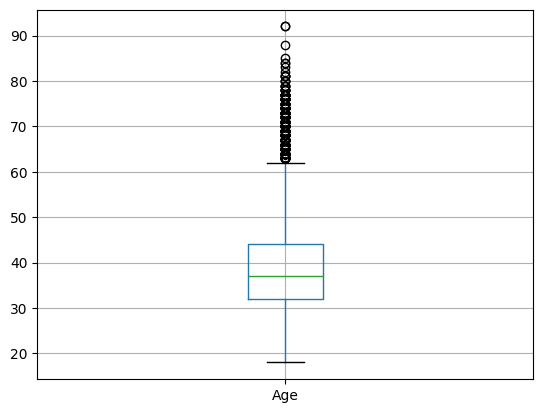

In [15]:
df[['Age']].boxplot();

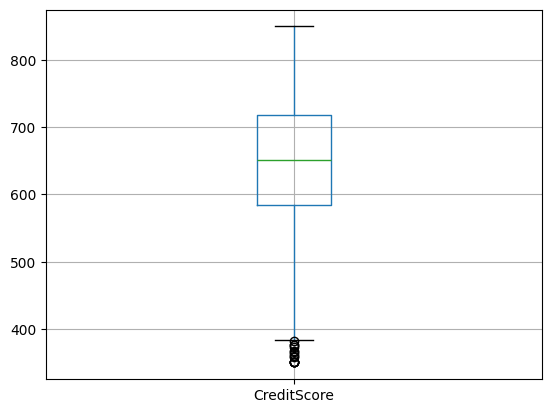

In [16]:
df[['CreditScore']].boxplot();

- L'étude des boxplots et la comparaison entre les valeurs moyennes et les medianes montrent l'éxistence de plusieurs valeurs abhérents (outliers et anomalies)
- On se propose dans le reste de l'analyse de garder ces clients

In [17]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

C:\Users\destockafric\AppData\Local\Temp\ipykernel_15016\1996449481.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exited", data=df, palette="CMRmap")


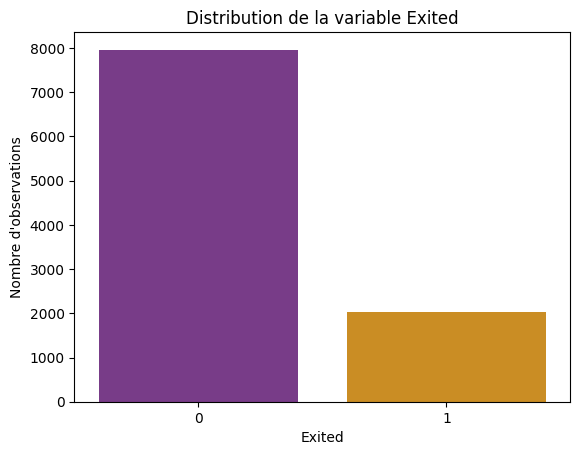

In [18]:
sns.countplot(x="Exited", data=df, palette="CMRmap")
plt.title("Distribution de la variable Exited")
plt.xlabel("Exited")
plt.ylabel("Nombre d'observations")
plt.show()


In [19]:
# est ce qu'on peut calculer le poucentage des clients qui ont quitter la banque ?
nbr_restants = df[df['Exited'] == 0].shape[0]
nbr_désaxés = df[df['Exited'] == 1].shape[0]

# Calcul du pourcentage des clients qui ont quitté la banque et de ceux qui sont restés.
print("poucentage des clients désaxés :", nbr_désaxés / (nbr_restants + nbr_désaxés ) * 100)
print("poucentage des clients restés :",nbr_restants / (nbr_restants + nbr_désaxés ) * 100)

poucentage des clients désaxés : 20.369999999999997
poucentage des clients restés : 79.63


<Axes: xlabel='Gender', ylabel='count'>

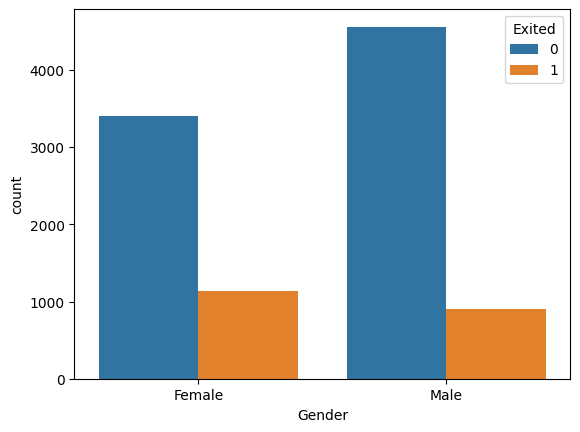

In [20]:
# Quantifiant l'effet de sexe sur la variable cible :
df['Gender'] = df['Gender'].astype('category')
sns.countplot(x="Gender", hue="Exited", data=df, palette="tab10")


- Malgré que les femmes minoritaires dans le lot des données , le nombre des femme qui quittent et supérier à celui des hommes

In [21]:
pd.crosstab(df['Geography'],df['Exited'], margins =True)

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


<Axes: xlabel='Geography', ylabel='count'>

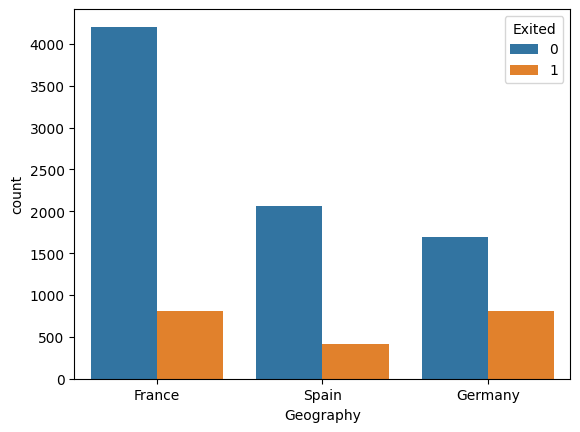

In [22]:
sns.countplot(x="Geography", hue="Exited", data=df, palette="tab10")

- Le nombre de clients allemands quittant la banque est supérieur à celui des clients français et espagnols, bien que le nombre total de clients allemands soit inférieur à celui des deux autres groupes. Cela indique un taux de churn proportionnellement plus élevé chez les clients allemands.
- En tant qu'analyste, il est essentiel de porter une attention particulière à la clientèle allemande. J'évaluerais leur contribution au chiffre d'affaires de la banque. Si, malgré leur nombre réduit, ces clients génèrent un revenu significatif par rapport aux autres segments, il serait judicieux de mettre en place des campagnes ciblées de rétention, telles que des offres promotionnelles ou des publicités personnalisées, afin de fidéliser ce segment stratégique.

In [23]:
%matplotlib inline

### Etude de la variable 'Age' : 

<Axes: xlabel='Age', ylabel='count'>

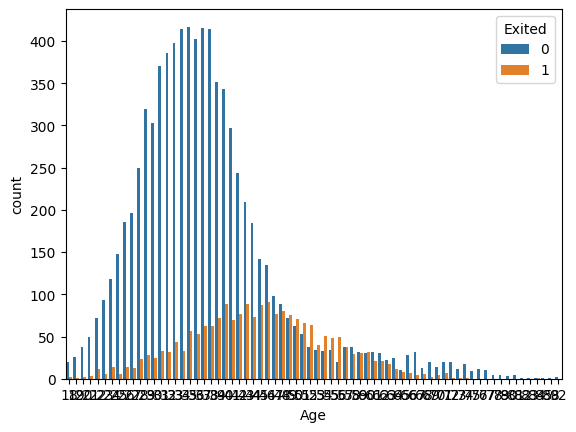

In [24]:
sns.countplot(x="Age", hue="Exited", data=df, palette="tab10")


- En observant ces deux histogrammes, on remarque que l'histogramme jaune semble décalé vers les âges plus élevés. Cela suggère qu'avec l'âge, la probabilité de quitter la banque augmente. Plus précisément, le centre de l'histogramme jaune reflète cette tendance.

- Cependant, il est également notable qu'il existe une certaine accumulation de clients très âgés (au-delà de 75 ans) qui restent fidèles à l'entreprise. On pourrait donc dire que, passé un certain âge (environ 75 ans), la probabilité de quitter la banque diminue de manière significative.

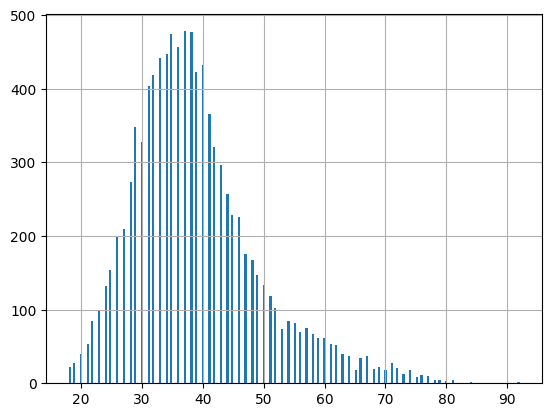

In [25]:
df['Age'].hist(bins = 200);

- On observe que l'histogramme de la variable Âge suit une distribution qui s'apparente à une loi du Khi-2.
- De plus, l'histogramme de l'âge des clients qui quittent la banque est décalé vers des valeurs plus élevées, ce qui indique que les clients plus âgés ont tendance à quitter davantage.

In [26]:
pd.crosstab(df['Age'], df['Exited'], margins= True)

Exited,0,1,All
Age,,,
18,20,2,22
19,26,1,27
20,38,2,40
21,50,3,53
22,72,12,84
...,...,...,...
84,1,1,2
85,1,0,1
88,1,0,1


### Etude de la variable 'HasCrCard' :

<Axes: xlabel='HasCrCard', ylabel='count'>

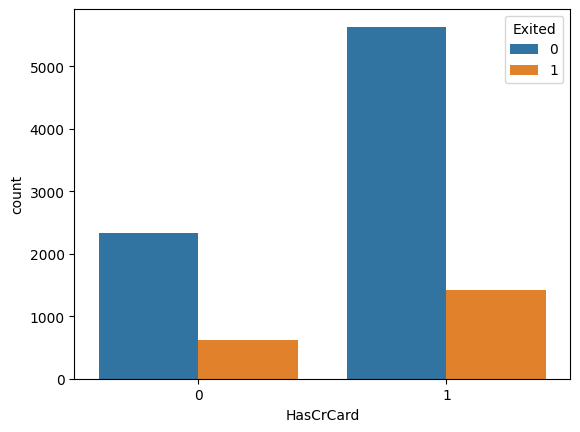

In [27]:
sns.countplot(x="HasCrCard", hue="Exited", data=df, palette="tab10")

- On constate que le nombre de clients disposant d'une carte de crédit est supérieur à celui des clients qui n'en possèdent pas. De plus, le nombre de clients quittant la banque semble suivre la même tendance. Par conséquent, il est difficile de tirer une conclusion claire concernant l'impact de la possession d'une carte de crédit sur le churn, car cette corrélation pourrait être influencée par d'autres facteurs.

In [28]:
pd.crosstab(df['HasCrCard'], df['Exited'], margins= True)

Exited,0,1,All
HasCrCard,,,
0,2332,613,2945
1,5631,1424,7055
All,7963,2037,10000


In [29]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Etude de la variable 'IsActiveMember'

<Axes: xlabel='IsActiveMember', ylabel='count'>

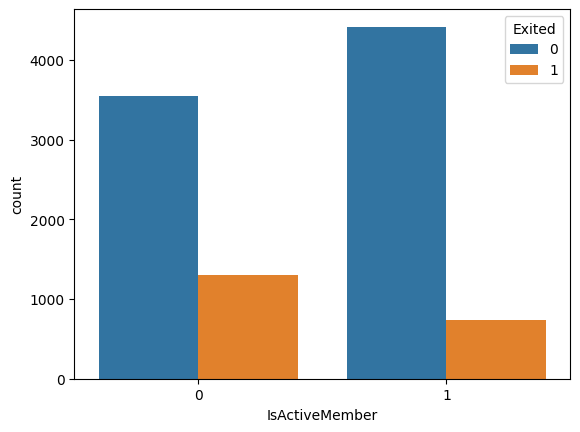

In [30]:
sns.countplot(x='IsActiveMember', hue="Exited", data=df, palette="tab10")

In [31]:
pd.crosstab(df['IsActiveMember'], df['Exited'], margins= True)

Exited,0,1,All
IsActiveMember,,,
0,3547,1302,4849
1,4416,735,5151
All,7963,2037,10000


- On remarque que les clients inactifs ont un risque plus élevé de quitter le service par rapport aux clients actifs. Cette observation suggère que le niveau d'activité des clients est un facteur important à considérer dans l'analyse du churn.

## Unifier l'Etude avec un code qui permet de representer les  "countplot" pour toutes les variables numériques

In [32]:
df.select_dtypes(include=['number']).columns


Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [33]:
num_var = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

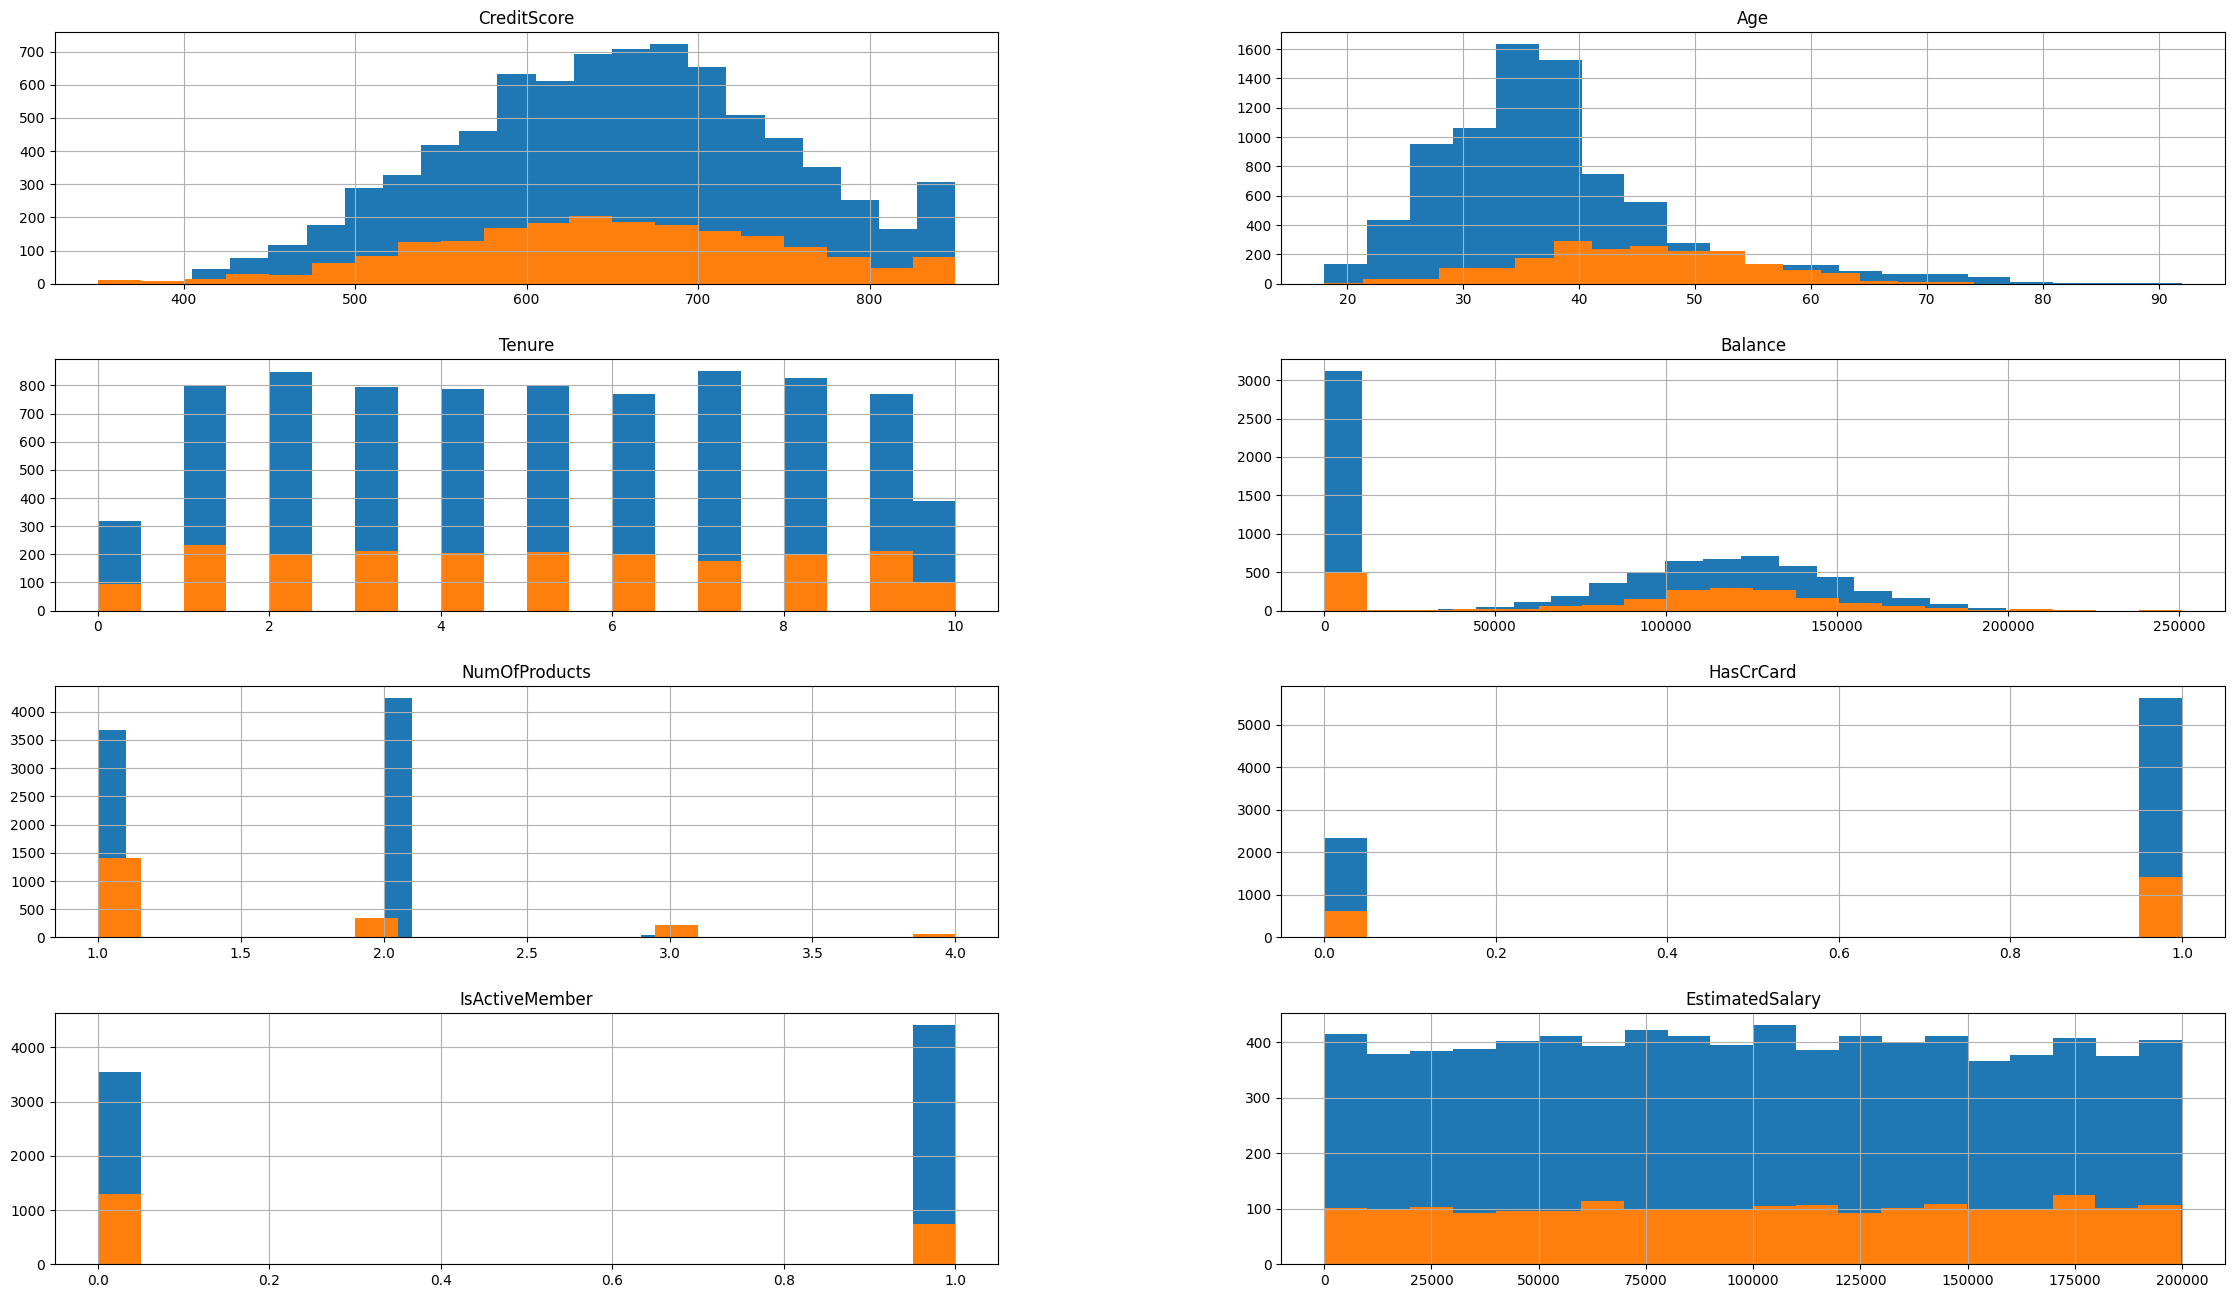

In [34]:
fig, ax = plt.subplots(4,2,figsize = (28,16))
df [df.Exited ==0][num_var].hist(bins=20, ax = ax)
df [df.Exited ==1][num_var].hist(bins=20, ax = ax);

### EstimatedSalary
- En observant la variable salaire estimé, on remarque que ce facteur n'a pas d'influence significative sur le churn. En effet, peu importe le niveau de salaire du client, la proportion des clients quittant la banque (calculée comme le nombre de clients ayant quitté divisé par le nombre total de clients) reste presque identique.

- Sur le graphique, bien que l'attention soit portée sur les clients qui restent (en bleu), il est clair que le nombre de clients quittant (en jaune) ne varie pas de manière notable en fonction du salaire. Cela indique que le salaire estimé n'est pas un facteur déterminant dans la probabilité de churn.

###  Tenure
- En analysant la variable Tenure (ancienneté), on observe qu'il y a peu de clients quittant la banque lorsque l'ancienneté est de 0, ce qui est logique étant donné qu'il s'agit de nouveaux clients. Ensuite, à mesure que le nombre total de clients augmente avec l'ancienneté, le nombre de clients quittant augmente également, avant de se stabiliser à un niveau constant.

- Cette tendance suggère qu'après une certaine durée, l'impact de l'ancienneté sur la probabilité de churn devient moins significatif.

### NumOfProducts
- En examinant le nombre de produits consommés par les clients, on constate que les clients qui utilisent uniquement un produit de notre service ont une probabilité plus élevée de quitter la banque. Cette probabilité diminue de manière significative pour les clients qui consomment deux, trois ou quatre produits.

- De plus, la majorité des clients se concentrent sur la consommation d’un ou deux produits, ce qui peut représenter un segment à risque en termes de churn. Cela met en évidence l'importance de promouvoir l'adoption de produits supplémentaires pour augmenter l'engagement et réduire le risque de départ des clients.

<Axes: >

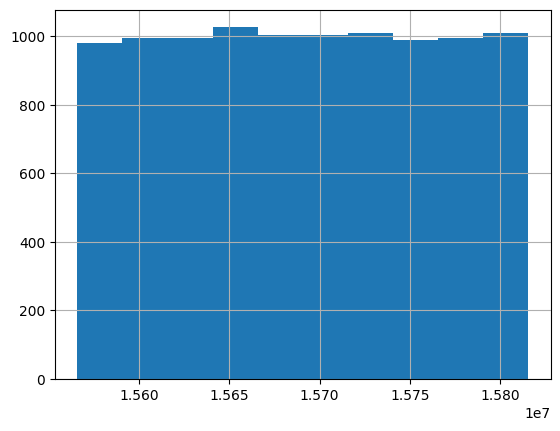

In [35]:
df['CustomerId'].hist()

- La distribution observée ici semble suivre une loi uniforme continue.
- Sous l'hypothèse d'équiprobabilité, il est difficile d'extraire des informations significatives ou des insights pertinents, car chaque valeur de la distribution a la même probabilité d'occurrence, ce qui limite l'analyse discriminante.

<Axes: >

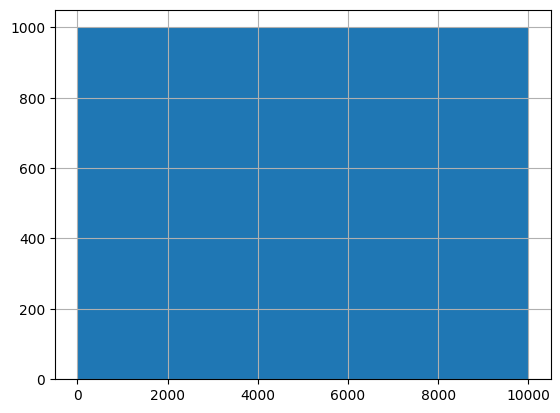

In [36]:
df['RowNumber'].hist()

- De même, cette colonne ne semble pas contenir d’informations pertinentes pour l’analyse.
- Il est donc judicieux de supprimer les colonnes non nécessaires, telles que CustomerId, Surname et RowNumber, qui n’apportent aucune valeur explicative ou prédictive pour le modèle.

In [37]:
df_cleaned = df.drop(columns=['CustomerId', 'Surname', 'RowNumber'])
df_cleaned

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


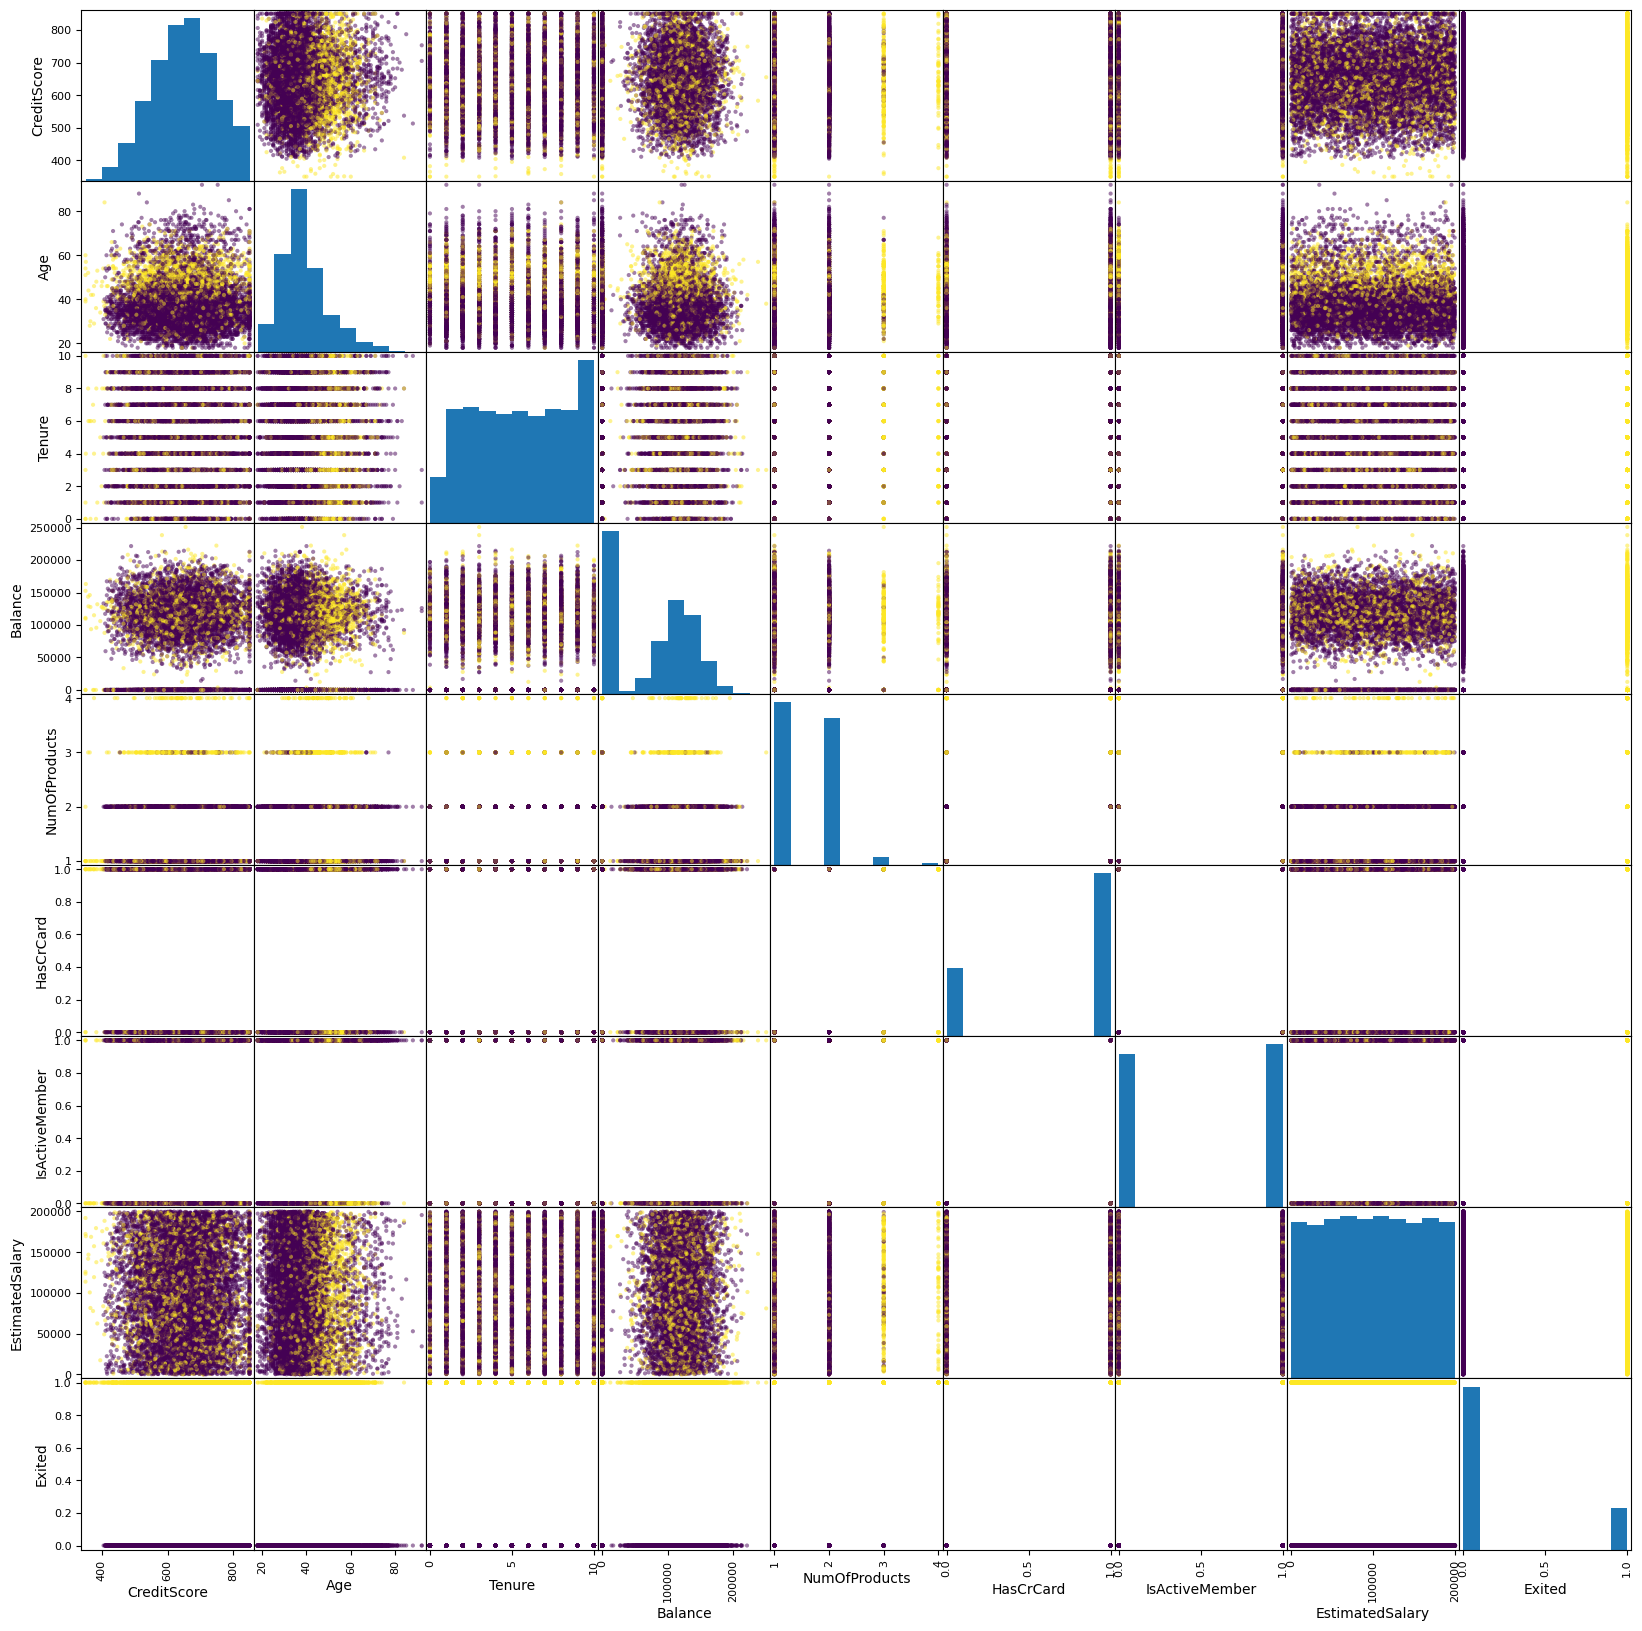

In [38]:
pd.plotting.scatter_matrix(df_cleaned, figsize=(20,20), c = df['Exited']);
#Note :
#Jaune : Clients qui quittent
#Violet : Clients qui restent

# Préparation des données :

### Encodage des variables qualitatives :

In [39]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(1), float64(2), int64(7), object(1)
memory usage: 791.3+ KB


In [40]:
df_quali = pd.get_dummies(df_cleaned[['Geography', 'Gender']], drop_first=True).astype(int)
df_quali

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,0
9998,1,0,1


In [41]:
df_cleaned.drop(columns=['Geography', 'Gender'], inplace=True)

In [42]:
# Dataframe sur laquele on va travailler :
df_final = pd.concat([df_quali, df_cleaned], axis = 1)

In [43]:
df_final

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,771,39,5,0.00,2,1,0,96270.64,0
9996,0,0,1,516,35,10,57369.61,1,1,1,101699.77,0
9997,0,0,0,709,36,7,0.00,1,0,1,42085.58,1
9998,1,0,1,772,42,3,75075.31,2,1,0,92888.52,1


### Preparation :

In [44]:
# Les variables Independantes :
X = df_final.iloc[:,0:-1]
# La variable Cible :
y = df_final.iloc[:,-1]

In [45]:
# Train / Test split :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 1)

In [46]:
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


### On va transformer toutes les variables et les ramener sur la même échelle.

In [47]:
# Remise à l'échelle : 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [48]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

""" ss.fit() :  Calcule les statistiques nécessaires à la standardisation (moyenne et écart type)
    ss.transform() :  Z = (X-moyenne) / écart type
"""

' ss.fit() :  Calcule les statistiques nécessaires à la standardisation (moyenne et écart type)\n    ss.transform() :  Z = (X-moyenne) / écart type\n'

- En classification, la variable cible est une variable discrète, dans notre cas binaire (0 et 1). On n'applique pas de transformations d'échelle à des variables discrètes.

# Application du modéle de classificiation : Modélisation à l'aide de l'algorithme ARBRE DE DECISION 

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")

- Par défaut la fonction permettant de mesurer la qualité d'une séparation ici c'est 'Gini'
- La formule de l'indice de Gini :
$$Gini = 1-(p_1)^2 - (p_2)^2 $$ 
- La formule de l'entropy de shanon : Cette quantité mesure le désordre.
$$Entropy = - (p_1 * log_2 (p_1) + p_2 * log_2(p_2))$$
- On cherche toujours à minimiser l'entropy (Plus le désordre est faible plus l'information est grande)

In [50]:
dt

DecisionTreeClassifier(criterion='entropy')

### Entrainement :

In [51]:
dt.fit(X_train_ss, y_train);

### Test (On va appliquer l'algorithme entrainé sur le lot de test)

In [52]:
y_pred = dt.predict(X_test_ss)

In [53]:
y_pred.shape


(2000,)

In [54]:
y_test.shape

(2000,)

In [55]:
S = sum(y_pred == y_test)

In [56]:
print("Le nombre de prédictions correcte par le modéle est :", S)

Le nombre de prédictions correcte par le modéle est : 1580


In [57]:
print("Le score basé sur l'accuracy:", S/ 2000)

Le score basé sur l'accuracy: 0.79


- Accuracy pour indice de gini = 0.8&nbsp;&nbsp;&nbsp;VS&nbsp;&nbsp;&nbsp;accuracy pour indice Entropy = 0.797

### Evaluation 

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1369,  216],
       [ 204,  211]])

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1585
           1       0.49      0.51      0.50       415

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.79      0.79      0.79      2000



In [60]:
# Le nombre de nœuds : (total des points de décision (nœuds internes) et des feuilles (nœuds terminaux))
dt.tree_.node_count


2205

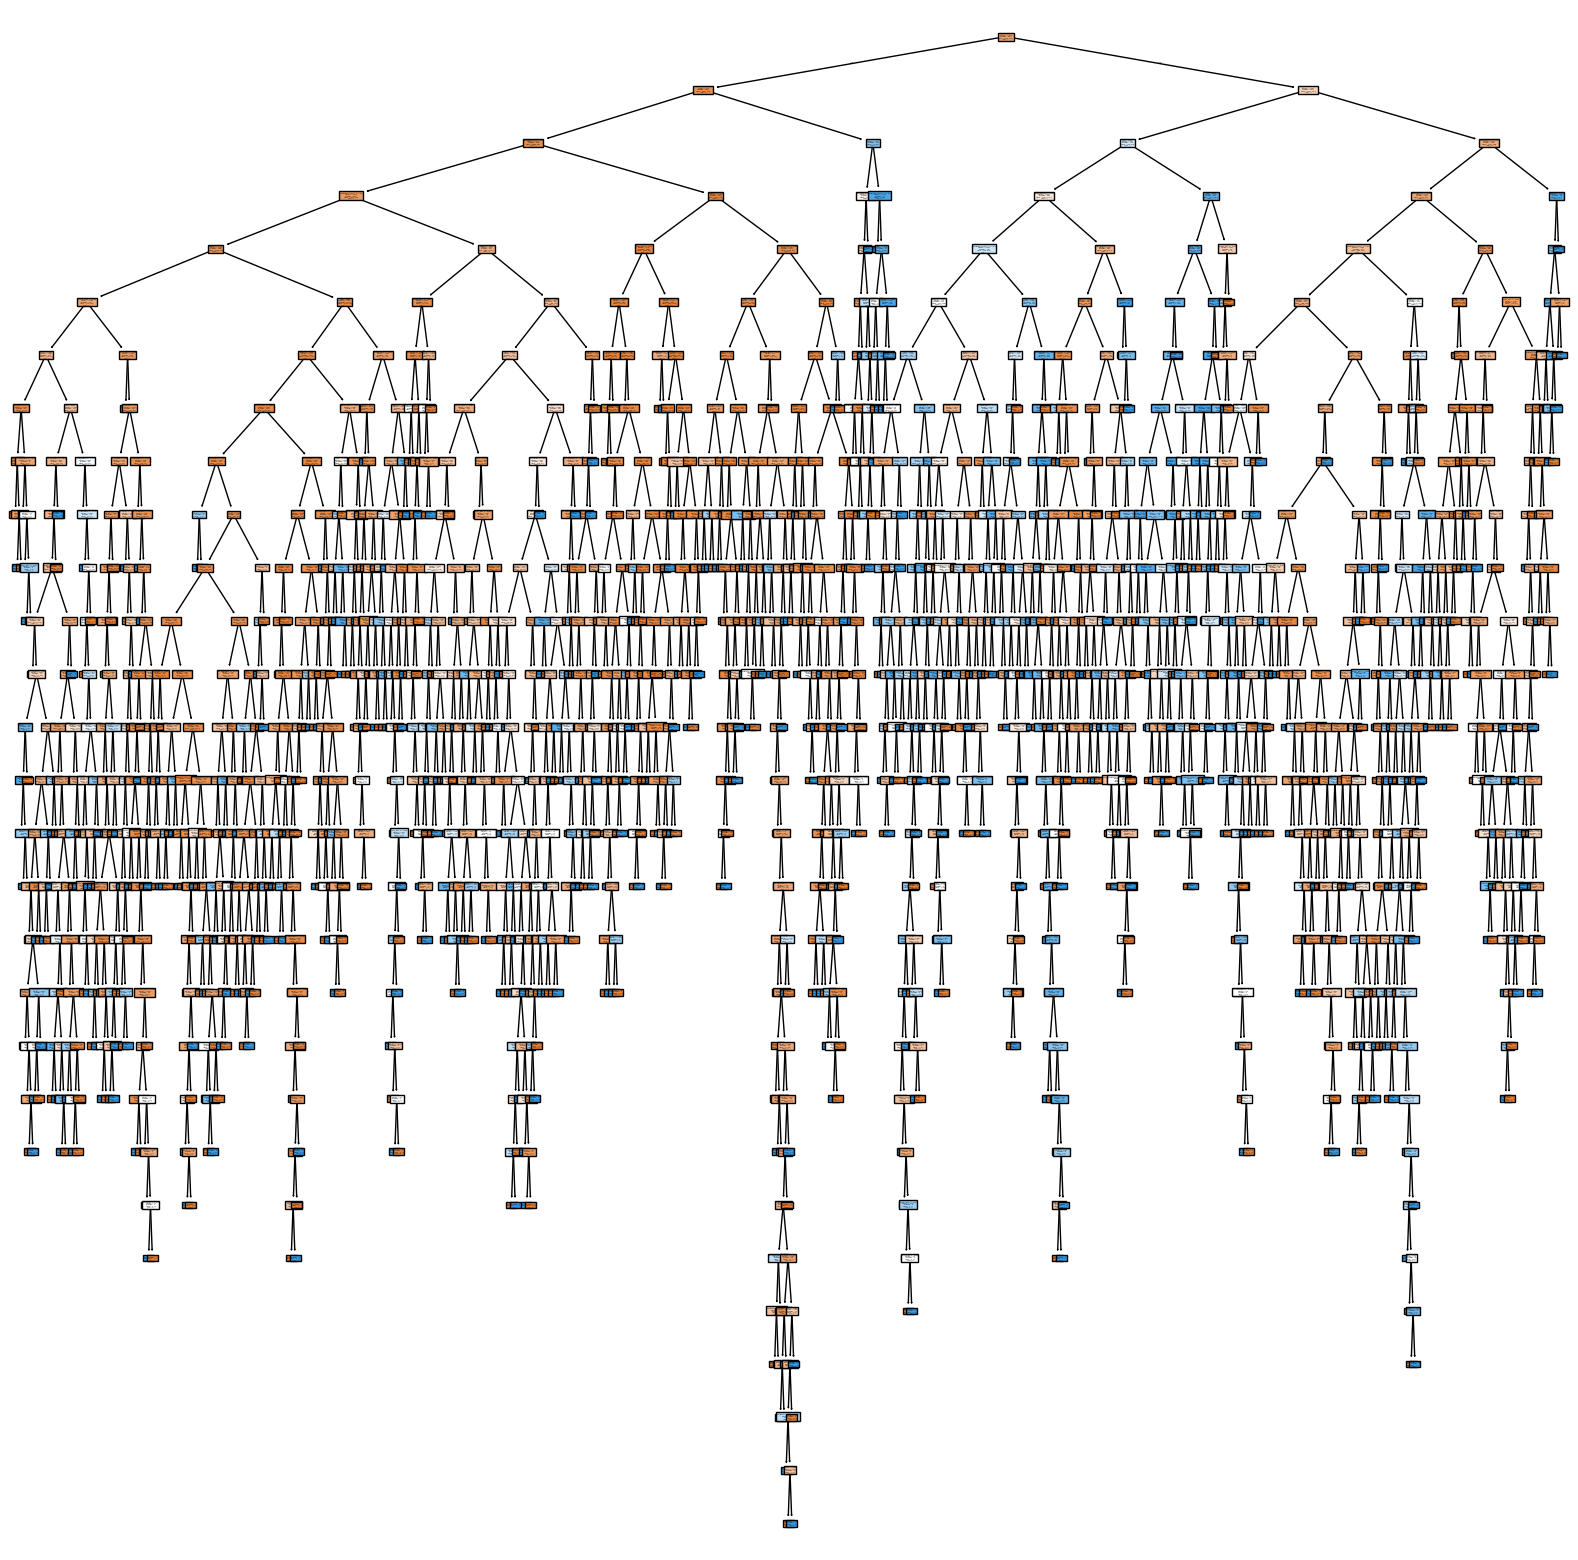

In [61]:
# On trace l'arbre :
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
plot_tree(dt, feature_names = X.columns, class_names=["0","1"], filled=True);

In [62]:
# On traduit maintenant notre arbre sous forme d'un texte : (Les régles de decision)
from sklearn.tree import export_text
print(export_text(dt, feature_names = X.columns, show_weights=True))

|--- Age <= 0.25
|   |--- NumOfProducts <= 1.66
|   |   |--- NumOfProducts <= -0.05
|   |   |   |--- Geography_Germany <= 0.57
|   |   |   |   |--- Balance <= -0.06
|   |   |   |   |   |--- IsActiveMember <= -0.02
|   |   |   |   |   |   |--- Tenure <= -1.22
|   |   |   |   |   |   |   |--- CreditScore <= 0.75
|   |   |   |   |   |   |   |   |--- Age <= -0.13
|   |   |   |   |   |   |   |   |   |--- weights: [22.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Age >  -0.13
|   |   |   |   |   |   |   |   |   |--- CreditScore <= -0.47
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |--- CreditScore >  -0.47
|   |   |   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CreditScore >  0.75
|   |   |   |   |   |   |   |   |--- EstimatedSalary <= 0.31
|   |   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- EstimatedSalary 

#### Code pour enregistrer notre arbre de decision (PDF, PNG) :

In [63]:
##from IPython.display import Image
##from sklearn import tree
#import pydotplus

# Créer DOT données : 
##dot_data = tree.export_graphviz(dt, out_file = None, feature_names= X.columns, class_names = ["0","1"])
# dessiner le graphe : 
##graph = pydotplus.graph_from_dot_data(dot_data)
# Afficher le graph :
##Image(graph.create_png())
# Créer un PDF : 
##graph.write_pdf("tree.pdf")
# Créer un PNG : 
##graph.write_png("tree.png")


### Elagage de l'arbre :

In [64]:
dt

DecisionTreeClassifier(criterion='entropy')

In [65]:
# Ici on va utiliser le GridSearchCV pour optimiser les deux hyperparamétres 'ccp_alpha' et 'Criterion'
from sklearn.model_selection import GridSearchCV

# Bon ici on définit la structure d'un dictionnaire comme ceci :
Grid_param = {"ccp_alpha" : np.linspace(0.0001, 0.5, 100),
              'criterion' : ['gini', 'entropy']}
# J'ai utiliser ci dessus la fonction np.linspace pour génerer un tableau de 100 valeurs réparties uniformément entre 0.0001 et 0.5
grid = GridSearchCV(DecisionTreeClassifier(), Grid_param, cv = 5)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([1.00000000e-04, 5.14949495e-03, 1.01989899e-02, 1.52484848e-02,
       2.02979798e-02, 2.53474747e-02, 3.03969697e-02, 3.54464646e-02,
       4.04959596e-02, 4.55454545e-02, 5.05949495e-02, 5.56444444e-02,
       6.06939394e-02, 6.57434343e-02, 7.07929293e-02, 7.58424242e-02,
       8.08919192e-02, 8.59414141e...
       3.83861616e-01, 3.88911111e-01, 3.93960606e-01, 3.99010101e-01,
       4.04059596e-01, 4.09109091e-01, 4.14158586e-01, 4.19208081e-01,
       4.24257576e-01, 4.29307071e-01, 4.34356566e-01, 4.39406061e-01,
       4.44455556e-01, 4.49505051e-01, 4.54554545e-01, 4.59604040e-01,
       4.64653535e-01, 4.69703030e-01, 4.74752525e-01, 4.79802020e-01,
       4.84851515e-01, 4.89901010e-01, 4.94950505e-01, 5.00000000e-01]),
                         'criterion': ['gini', 'entropy']})

In [66]:
# On affiche nos meilleurs hyperparamètres :
grid.best_params_

{'ccp_alpha': np.float64(0.00514949494949495), 'criterion': 'entropy'}

In [67]:
# On affiche le meilleur score :
grid.best_score_

np.float64(0.8531000000000001)

- Après l'optimisation des hyperparamètres, le modèle a atteint un meilleur score de 0,853, contre 0,787 avant l'ajustement. Cela montre une amélioration significative des performances

In [ ]:
# Nous réutilisons notre modèle, mais cette fois avec des hyperparamètres optimisés
dt = DecisionTreeClassifier(ccp_alpha= 0.00514949494949495, criterion = 'entropy', max_depth = 7) 
# Ci-dessous, dans la partie sur la validation curve, je vais expliquer pourquoi j'ai choisi max_depth = 7
dt.fit(X_train, y_train)
# Bon ici on a pas utiliser X_train_ss c'est pour avoir des vrais valeurs pour les régles de décision

DecisionTreeClassifier(ccp_alpha=0.00514949494949495, criterion='entropy')

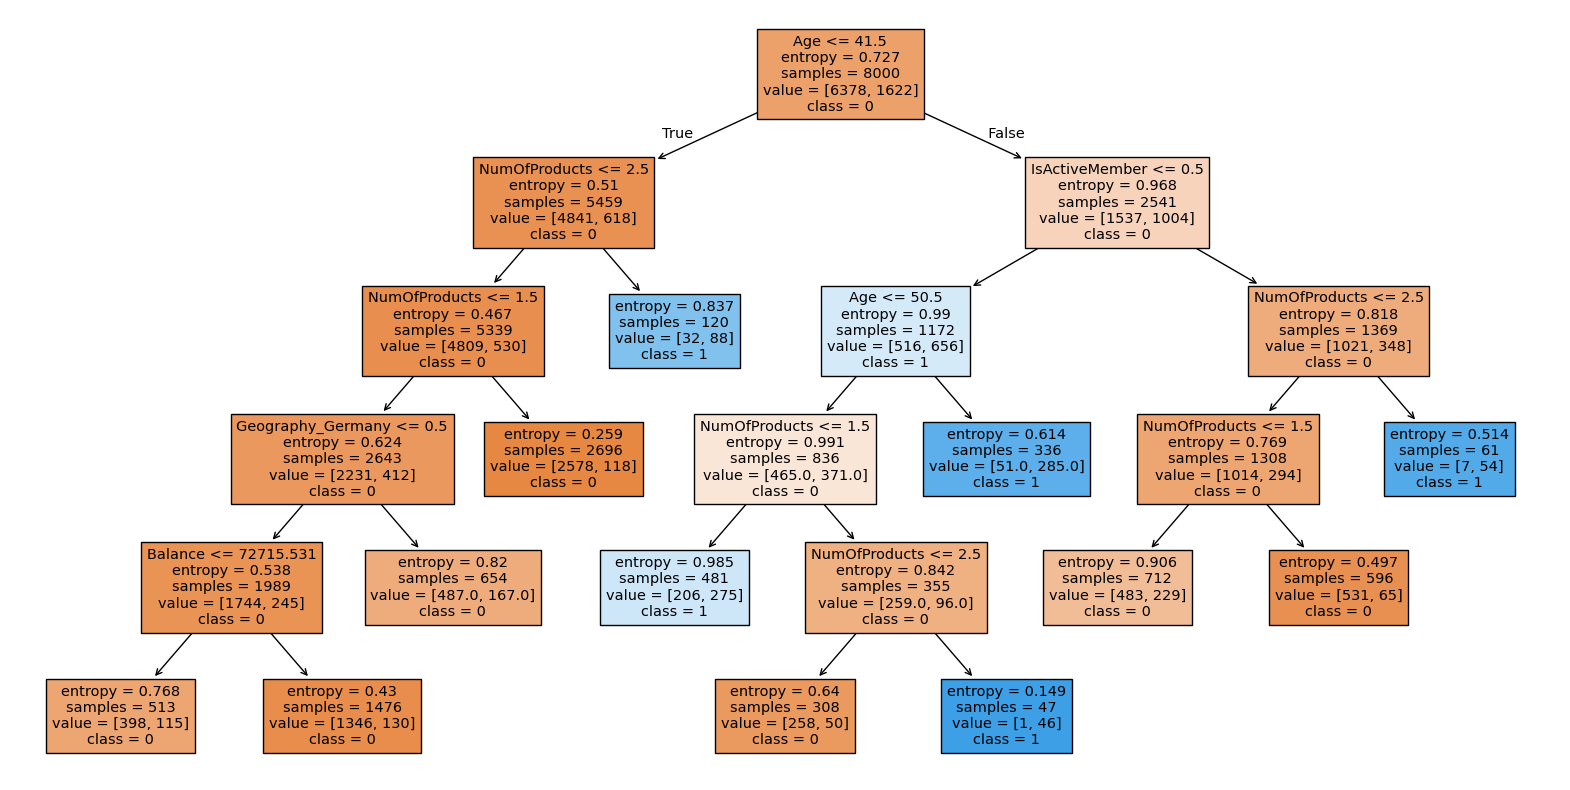

In [69]:
# Maintenant on trace l'arbre de decision 
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names = X.columns, class_names=["0","1"], filled=True);

* Très bon résultat

In [70]:
# On traduit maintenant notre arbre sous forme d'un texte : (Les régles de decision)
from sklearn.tree import export_text
print(export_text(dt, feature_names = X.columns, show_weights=True))

|--- Age <= 41.50
|   |--- NumOfProducts <= 2.50
|   |   |--- NumOfProducts <= 1.50
|   |   |   |--- Geography_Germany <= 0.50
|   |   |   |   |--- Balance <= 72715.53
|   |   |   |   |   |--- weights: [398.00, 115.00] class: 0
|   |   |   |   |--- Balance >  72715.53
|   |   |   |   |   |--- weights: [1346.00, 130.00] class: 0
|   |   |   |--- Geography_Germany >  0.50
|   |   |   |   |--- weights: [487.00, 167.00] class: 0
|   |   |--- NumOfProducts >  1.50
|   |   |   |--- weights: [2578.00, 118.00] class: 0
|   |--- NumOfProducts >  2.50
|   |   |--- weights: [32.00, 88.00] class: 1
|--- Age >  41.50
|   |--- IsActiveMember <= 0.50
|   |   |--- Age <= 50.50
|   |   |   |--- NumOfProducts <= 1.50
|   |   |   |   |--- weights: [206.00, 275.00] class: 1
|   |   |   |--- NumOfProducts >  1.50
|   |   |   |   |--- NumOfProducts <= 2.50
|   |   |   |   |   |--- weights: [258.00, 50.00] class: 0
|   |   |   |   |--- NumOfProducts >  2.50
|   |   |   |   |   |--- weights: [1.00, 46.00] cla

In [71]:
##from IPython.display import Image
##from sklearn import tree
#import pydotplus

# Créer DOT données : 
##dot_data = tree.export_graphviz(dt, out_file = None, feature_names= X.columns, class_names = ["0","1"])
# dessiner le graphe : 
##graph = pydotplus.graph_from_dot_data(dot_data)
# Afficher le graph :
##Image(graph.create_png())
# Créer un PDF : 
##graph.write_pdf("tree.pdf")
# Créer un PNG : 
##graph.write_png("tree.png")

[ 4  7  9  0  6  8 10  5  3  2  1]
classement des variables :
1. feature 4 (0.439997)Age
2. feature 7 (0.393666)NumOfProducts
3. feature 9 (0.112756)IsActiveMember
4. feature 0 (0.027052)Geography_Germany
5. feature 6 (0.026528)Balance
6. feature 8 (0.000000)HasCrCard
7. feature 10 (0.000000)EstimatedSalary
8. feature 5 (0.000000)Tenure
9. feature 3 (0.000000)CreditScore
10. feature 2 (0.000000)Gender_Male
11. feature 1 (0.000000)Geography_Spain


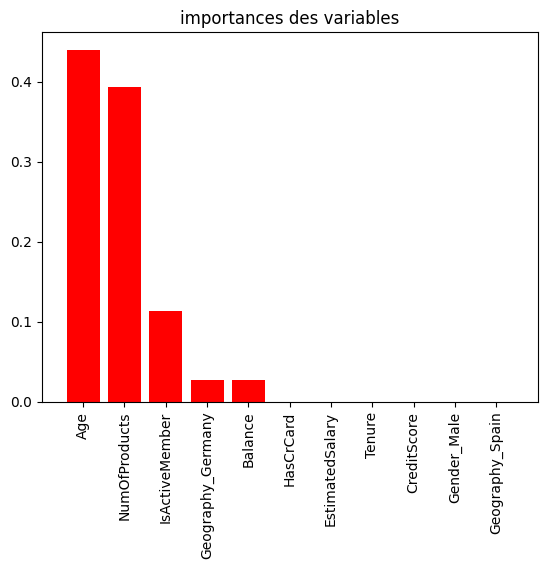

In [75]:
# Les variables les plus importantes :
Importances = dt.feature_importances_
indices = np.argsort(Importances)[::-1]
print(indices)
# Tri des variables selon leur importance :
print('classement des variables :')
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1 , indices[f], Importances[indices[f]]) + X.columns[indices[f]])
# Tracer les importances des variables basées sur l'impureté dans la forêt.
plt.figure()
plt.title('importances des variables')
plt.bar(range(X.shape[1]), Importances[indices], color ='r', align = 'center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

- Les importances des variables montrent que certaines caractéristiques contribuent beaucoup plus au modèle que d'autres. La variable Age a la plus grande importance (0.44), indiquant qu'elle est le facteur le plus déterminant dans la prédiction. Suivent NumOfProducts (0.39) et IsActiveMember (0.11), ce qui souligne l'impact du nombre de produits consommés et de l'activité du client. Les variables Geography_Germany (0.027) et Balance (0.026) ont une influence plus modérée, tandis que les autres variables telles que Geography_Spain, Gender_Male, CreditScore, Tenure, HasCrCard, et EstimatedSalary ont une importance nulle, suggérant qu'elles n'ont pas contribué au modèle dans ce cas précis.

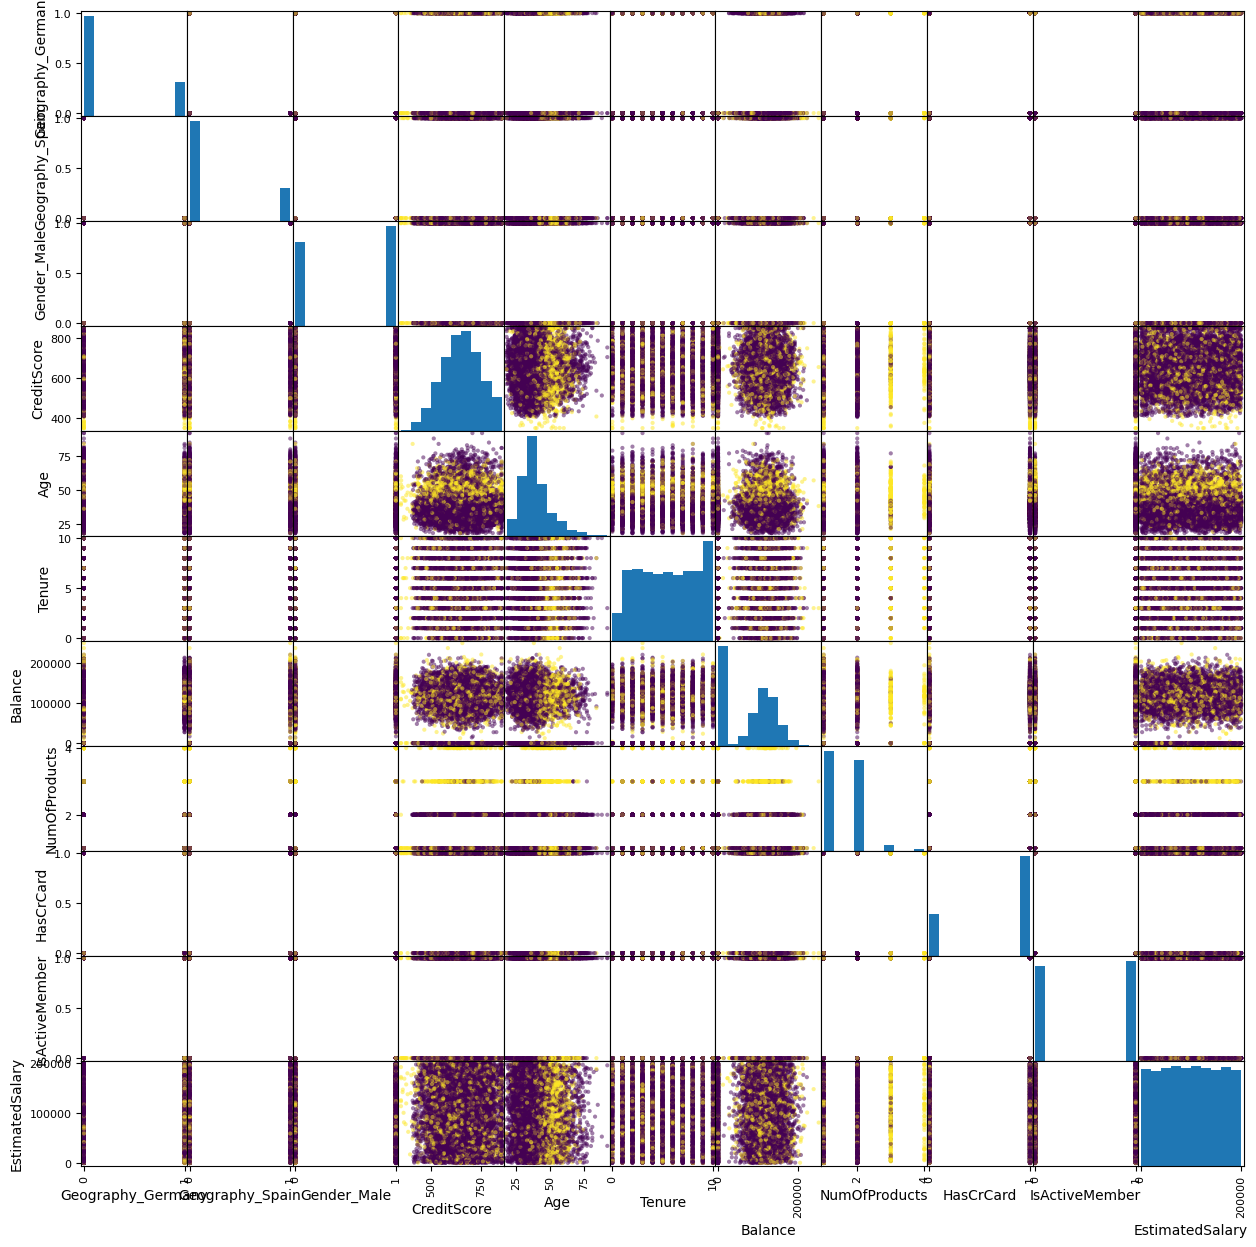

In [ ]:
pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15));

- On remarque ici sur le plot que l'age (depuis l'étape de la description des données) et le nombre de produits sont sur une très bonne séparation entre les classes, en revanche pour la variable Gender par exemple, il n'y a pas de distinction claire, ce qui suggère qu'elle est peu discriminante pour le modèle

### Evaluation du modéle 

In [ ]:
y_pred = dt.predict(X_test) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1585
           1       0.74      0.46      0.57       415

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

[[1517   68]
 [ 224  191]]


- D'après l'analyse des 2000 dossiers de clients, l'arbre de décision a permis d'identifier 1517 bons clients avec certitude. De plus, 191 mauvais clients ont également été correctement détectés et exclus. Pour 68 dossiers, bien qu'ils soient considérés comme des mauvais clients, le modèle les a traités comme de bons clients ; cela reste gérable, car ces cas peuvent être examinés individuellement. Cependant, l'effort principal doit se concentrer sur les 224 dossiers identifiés comme de bons clients mais qui sont en réalité des mauvais clients. Grâce à cette approche, nous avons optimisé notre charge de travail en réduisant le nombre de dossiers à examiner manuellement, passant d'environ 2000 à seulement 224, soit une réduction de près de 90 %.


- Notre modèle est désormais prêt pour la production. Il ne reste plus qu'à enregistrer ses paramètres dans un fichier pickle afin de l’implémenter efficacement dans l’environnement de production.

### En fixant la profendeur maximale de l'arbre (Validation curve)

In [77]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# On fait varier le max depth
depth = np.arange(1, 31) # Définir la plage de valeurs pour l'hyperparamètre
train_score, val_score = validation_curve(model, X_train, y_train, param_name='max_depth', param_range=depth, cv=5)

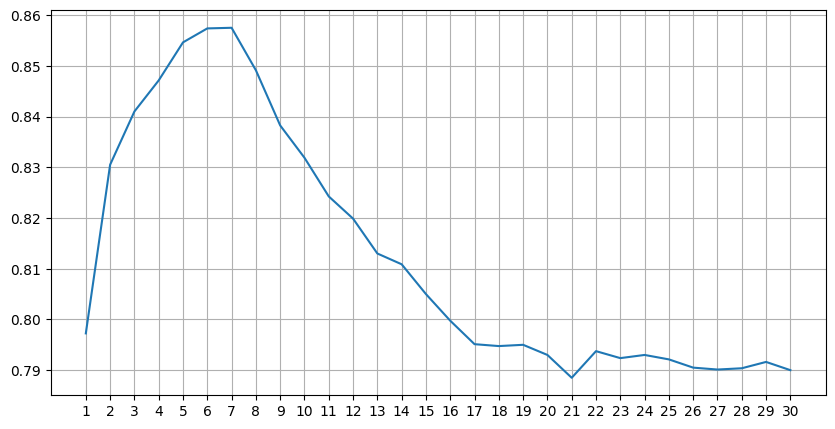

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(depth,val_score.mean(axis = 1));
plt.xticks(depth);
plt.grid();

- Ce que l'on observe ici, c'est que plus la profondeur de l'arbre augmente, plus le modèle devient complexe (augmentation de la complexité)
- La meilleure profondeur pour l'arbre est 7, car elle correspond à la meilleure précision du modèle
- Nous allons donc ajouter dans les paramètres de l'arbre de décision : 'max_depth' = 7

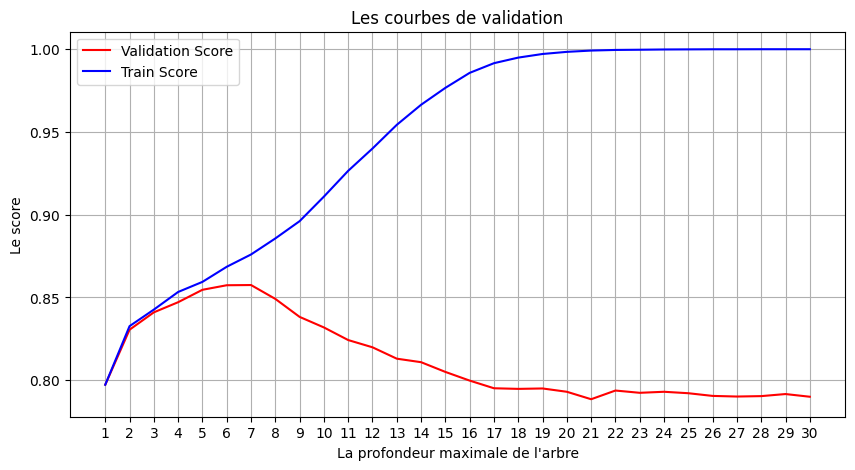

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(depth, val_score.mean(axis=1), label='Validation Score', color='red')  # Courbe de validation
plt.plot(depth, train_score.mean(axis=1), label='Train Score', color='blue')  # Courbe d'entraînement
plt.xticks(depth)
plt.grid()
plt.xlabel("La profondeur maximale de l'arbre")
plt.ylabel("Le score")
plt.title("Les courbes de validation")
plt.legend()
plt.show()


- Maintenant que mon modèle est fixé (les paramètres sont bien réglés), bon la question que je peux poser, à partir de quelle quantité de données je peux encore améliorer mon score ?

- Pour répondre à cette question, je vais utiliser les courbes d'apprentissage.

### les courbes d'apprentissage (Learning curves)

In [85]:
# dt est notre modèle réglé
from sklearn.model_selection import learning_curve
# Appliquer learning_curve pour différentes tailles d'échantillons d'entraînement
train_sizes, train_score, val_score = learning_curve(dt, X, y, train_sizes=np.linspace(0.1, 1, 10), cv=5)
# Afficher les tailles d'échantillons d'entraînement
print(train_sizes)

[ 800 1600 2400 3200 4000 4800 5600 6400 7200 8000]


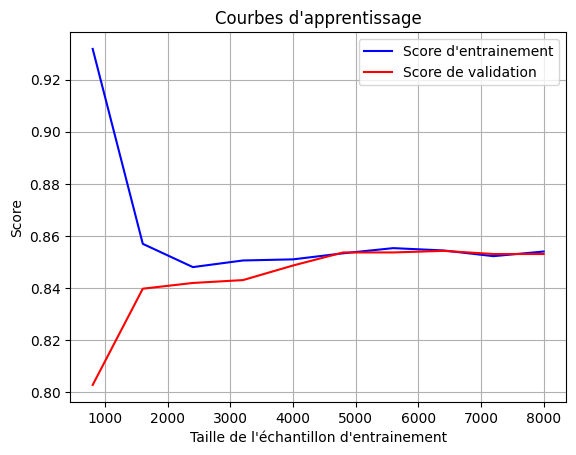

In [87]:
plt.plot(train_sizes, train_score.mean(axis=1), color='blue', label='Score d\'entrainement')
plt.plot(train_sizes, val_score.mean(axis=1), color='red', label='Score de validation')
plt.grid()
plt.xlabel('Taille de l\'échantillon d\'entrainement')
plt.ylabel('Score')
plt.title('Courbes d\'apprentissage')
plt.legend()
plt.show()

- À une taille de 1000, on ne peut pas vraiment faire d'interprétation. Bien sûr, il y a un overfitting, on remarque que le score d'entraînement est très supérieur au score sur les  données de test. Cependant, en augmentant le nombre de clients, on observe une stabilisation à partir de 5000
- À partir de 5000, le modèle se stabilise, il n'y a plus d'amélioration, donc cela ne sert à rien d'ajouter davantage de données
- En termes de business pour notre banque, cela permet d'optimiser les ressources : on peut acheter moins de profils clients pour mener l'étude